In [1]:
from core.metrics import *
from core.semcor_bert_pipeline import load_data
from core.analysis import *
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import pandas as pd

<Figure size 432x288 with 0 Axes>

## MDS on Centroids of Shared Words

In [2]:
shared_words = ['foot', 'table', 'plane', 'degree', 'right', 'model']
db = access_db() #Some senses that were logged were not used in expt

In [3]:
def normalize_cos_dist(cs_mtx):
    max_value = np.max(1 - cs_mtx)
    return (1 - cs_mtx) / max_value

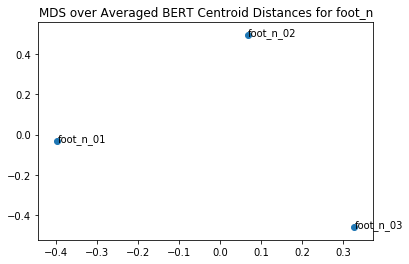

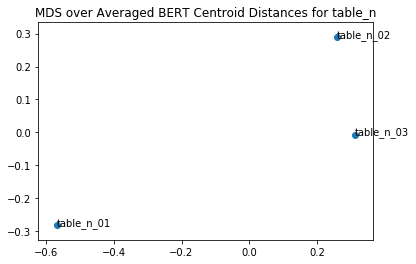

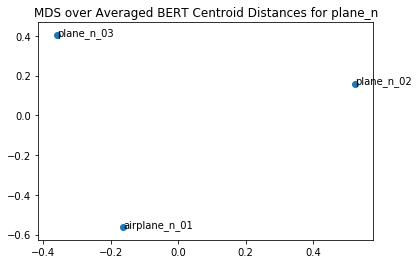

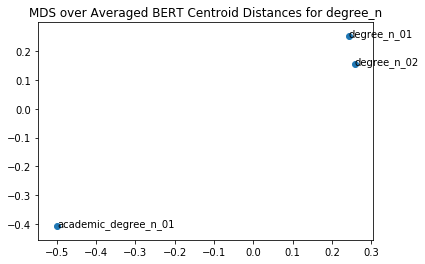

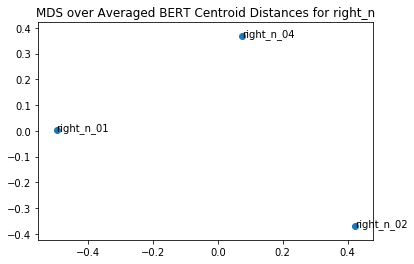

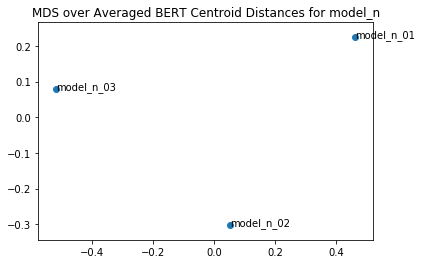

In [62]:
for w in shared_words:
    result_mtx, sense_names = cosine_sim_mtx(w, 'n',
                                             sel_senses = [fb_to_local(s) for s in get_senses(db, w + "_n")])
    #result_mtx = normalize_cos_dist(result_mtx)
    result_mtx = normalize_cos_dist(result_mtx)
    mds_model = MDS(n_components = 2, dissimilarity = 'precomputed')
    plot_mds(result_mtx, w + '_n', mds_model, db, "BERT Centroid")

## Comparison with Experiment Results

In [66]:
results, incl_users = get_results_elig_users(db, "Self Consistency", 0.2)

Spearman Rank correlations for BERT embeddings for shared words vs. human data. Averages distances reported from experimental data reported below for comparison. 

Spearman Rank Correlations for Shared Words
foot 0.5
table 0.5
plane 0.5
degree 0.5
right 1.0
model 1.0


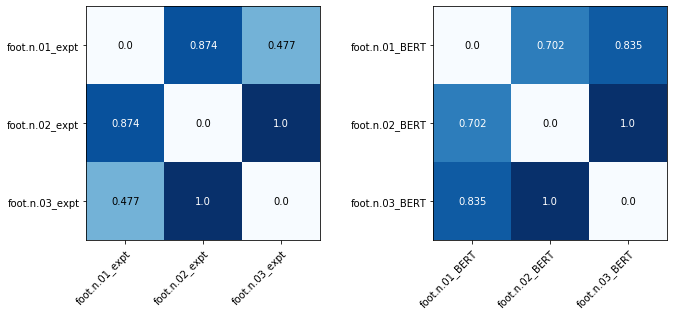

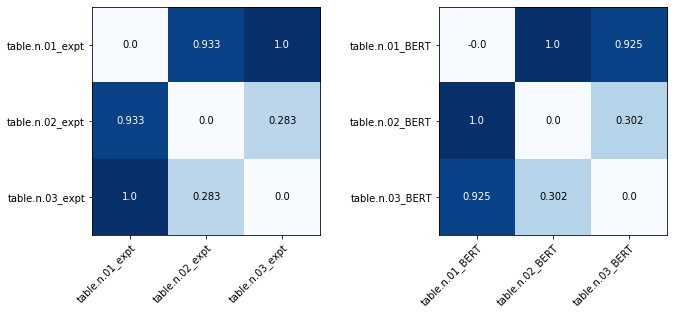

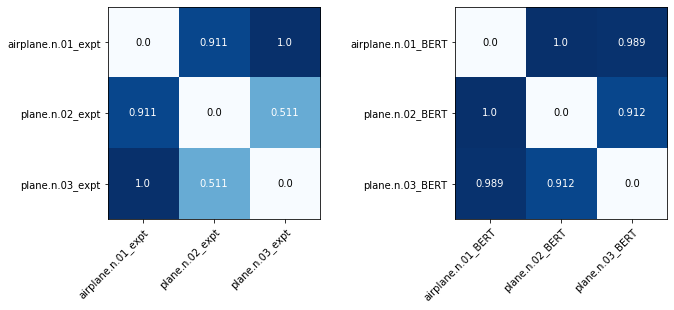

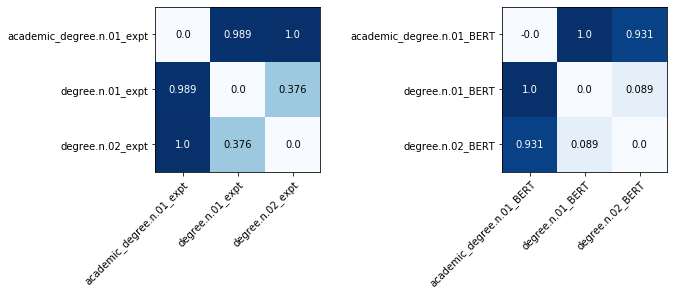

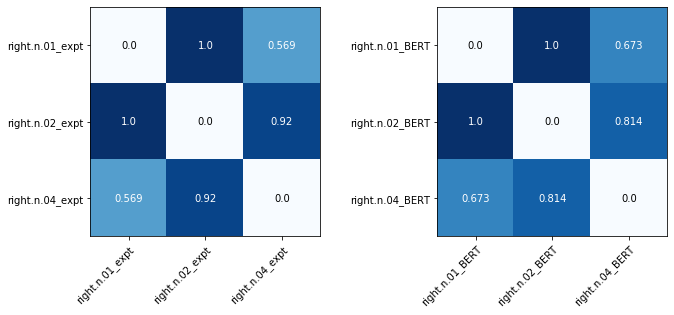

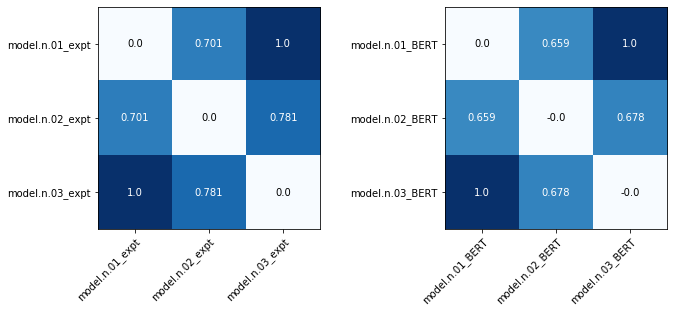

In [67]:
matrices = {w: {} for w in shared_words}

print("Spearman Rank Correlations for Shared Words")
for w in shared_words:
    expt_means = mean_distance_mtx(results, w + '_n', 'shared', incl_users)
    expt_means /= np.max(expt_means) #normalizing average reported distances
    matrices[w]['expt'] = expt_means
    bert_cs, sense_names = cosine_sim_mtx(w, 'n', sel_senses = [fb_to_local(s) for s in get_senses(db, w + "_n")])
    bert_cs = normalize_cos_dist(bert_cs)
    matrices[w]['bert'] = bert_cs
    print(w, mtx_correlation([matrices[w]['bert']], [matrices[w]['expt']]))
    fig = plt.figure(figsize = (10, 10))
    ax1 = plt.subplot(1, 2, 1)
    ax2 = plt.subplot(1, 2, 2)
    im1 = ax1.imshow(expt_means)
    annotate_mtx(expt_means, im1, ax1, [s + "_expt" for s in sense_names])
    im2 = ax2.imshow(bert_cs)
    annotate_mtx(bert_cs, im2, ax2, [s + '_BERT' for s in sense_names])
    fig.tight_layout(pad = 3.0)
